

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import plotly.express as px

Problem Statement

From the dataset given, answer the following questions
1. 

In [2]:
#load dataset

car_data = pd.read_csv(r"C:\Users\Administrator\Desktop\Datasets\car_details.csv")
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
car_data.shape

(4340, 8)

### Exploratory Analysis

In [7]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
# number of cars in the dataset

number_of_cars  = car_data['name'].value_counts()

In [9]:
top_10_cars  = number_of_cars.sort_values(ascending=False)[:10]
top_10_cars

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Maruti Alto LX              35
Hyundai EON Era Plus        35
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI BSIV       29
Maruti Swift VDI            27
Maruti Wagon R LXI Minor    24
Hyundai EON Magna Plus      24
Name: name, dtype: int64

In [10]:
list(top_10_cars.keys())

['Maruti Swift Dzire VDI',
 'Maruti Alto 800 LXI',
 'Maruti Alto LXi',
 'Maruti Alto LX',
 'Hyundai EON Era Plus',
 'Maruti Wagon R VXI BS IV',
 'Maruti Swift VDI BSIV',
 'Maruti Swift VDI',
 'Maruti Wagon R LXI Minor',
 'Hyundai EON Magna Plus']

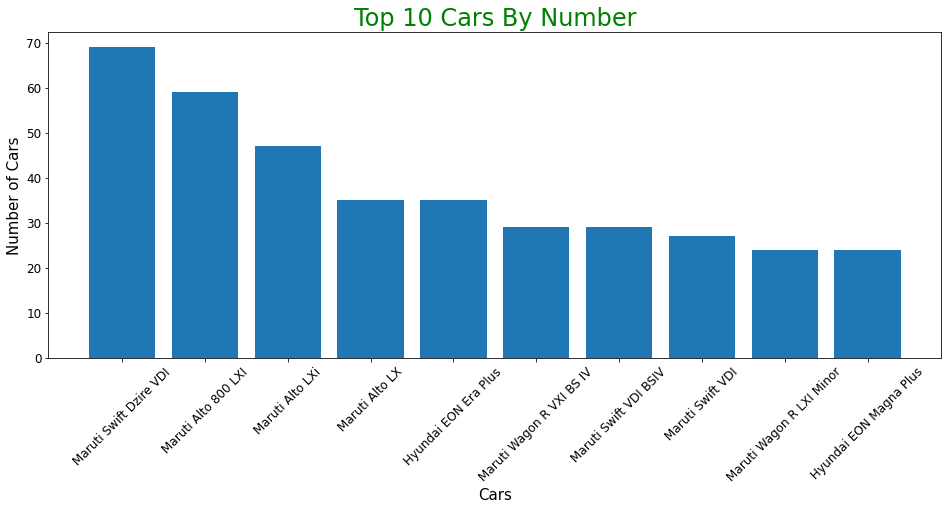

In [11]:
plt.figure(figsize=(16,6))
plt.bar(list(top_10_cars.keys()),list(top_10_cars))
plt.title('Top 10 Cars By Number',fontsize=24,color='green')
plt.xlabel('Cars', fontsize=15)
plt.ylabel('Number of Cars', fontsize= 15)
plt.xticks(rotation=45, color='black',fontsize=12)
plt.yticks(color='black',fontsize=12)
plt.show()

In [12]:
# exploring years
each_year_cars = car_data['year'].value_counts()

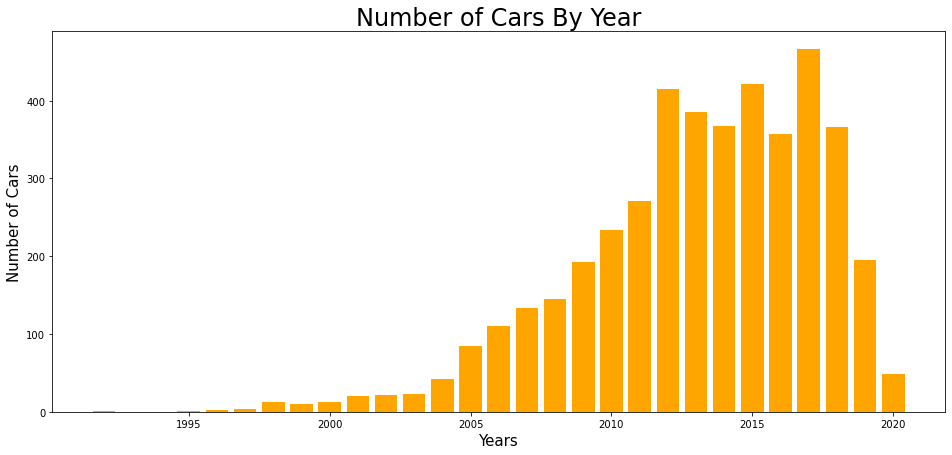

In [13]:
plt.figure(figsize=(16,7))
plt.bar(list(each_year_cars.keys()),list(each_year_cars),color='orange')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of Cars', fontsize=15)
plt.title('Number of Cars By Year',fontsize=24)
plt.show()

In [14]:
# Top 10 expensive cars
exp_cars = car_data[['name','year','selling_price']].sort_values(by='selling_price',ascending=False)[:10]
exp_cars

,name,year,selling_price
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000
2258,BMW X5 xDrive 30d xLine,2019,4950000
612,BMW X5 xDrive 30d xLine,2019,4950000
1836,BMW X5 xDrive 30d xLine,2019,4950000
555,BMW X5 xDrive 30d xLine,2019,4950000
2739,BMW X5 xDrive 30d xLine,2019,4950000
1023,BMW X5 xDrive 30d xLine,2019,4950000
900,BMW X5 xDrive 30d xLine,2019,4950000


In all the cars in the dataset, Audi RS7 is most expensive and it was sold in 2016.
And Mercedes-Benz S-Class was also expensive in the following year, 2017

In [15]:
# Top 10 cheap cars
cheap_cars = car_data[['name','year','selling_price']].sort_values(by='selling_price',ascending=True)[:10]
cheap_cars

,name,year,selling_price
2662,Ford Ikon 1.6 ZXI NXt,2005,20000
2495,Ford Ikon 1.4 ZXi,2000,22000
2444,Maruti 800 EX,2004,30000
3206,OpelCorsa 1.4 GL,2002,35000
2849,Tata Nano Std BSII,2009,35000
1832,Tata Nano LX SE,2012,35000
4290,Maruti 800 Std,2004,37500
877,Tata Nano Std,2011,40000
3215,Maruti 800 AC,2004,40000
2730,Tata Nano Lx,2010,40000


The cheapest car is Ford Ikon and its selling price is $20000 in the year 2005

In [16]:
# Top cars with high Km_driven 
km_driven_cars = car_data[['name','km_driven','selling_price']].sort_values(by='km_driven',ascending=False)
km_driven_cars

,name,km_driven,selling_price
1243,Maruti Swift VXI BSIII,806599,250000
4184,Maruti SX4 S Cross DDiS 320 Delta,560000,665000
525,Maruti SX4 S Cross DDiS 320 Delta,560000,665000
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,400000,400000
2394,Toyota Innova 2.5 V Diesel 8-seater,350000,350000
...,...,...,...
3703,Ford EcoSport 1.5 Diesel Trend BSIV,1000,841000
1715,Ford Figo Titanium,101,635000
1716,Ford Ecosport 1.5 Diesel Titanium,101,1000000
1714,Ford Freestyle Titanium Diesel,101,784000


In [17]:
# Number of Petrol and Diesel cars
fuel_type = car_data['fuel'].value_counts()
fuel_type

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

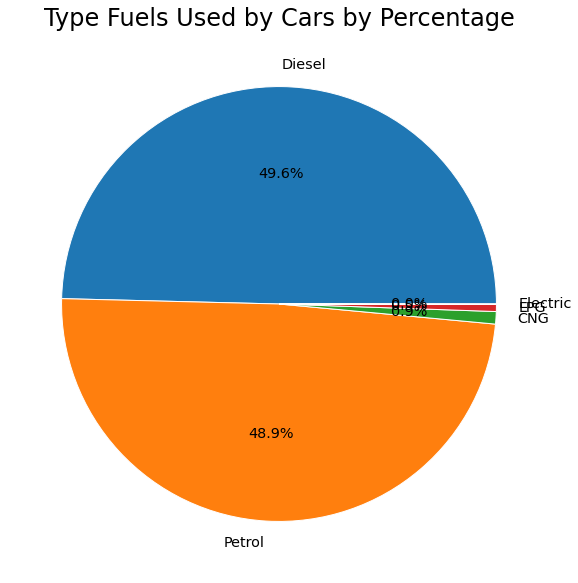

In [18]:
plt.figure(figsize=(10,10))
plt.pie(fuel_type,labels=list(fuel_type.keys()),autopct='%1.1f%%',
       wedgeprops={'linewidth':1.0,'edgecolor':'white'},
       textprops={'size': 'x-large'})
plt.title('Type Fuels Used by Cars by Percentage',fontsize=24)

plt.show()

The pie chart shows that most of the cars use Diesel and Petrol.  
A few cars use CNG, LPG and Electricity

In [19]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [20]:
# correlation between selling price and km_driven
corr = car_data[['selling_price','km_driven']].corr()
corr

,selling_price,km_driven
selling_price,1.000000,-0.192289
km_driven,-0.192289,1.000000


There is a negative correlation between the selling price and km driven of the cars

In [21]:
seller_type = car_data['seller_type'].value_counts()
seller_type

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

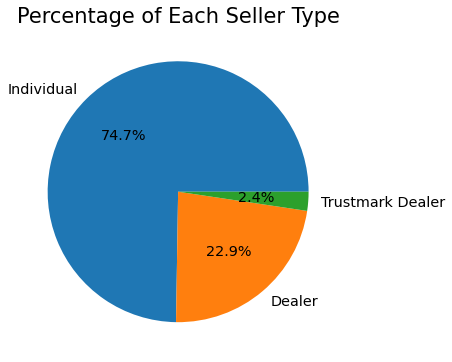

In [22]:
plt.figure(figsize=(6,6))
plt.pie(seller_type,labels=list(seller_type.keys()),autopct = '%.1f%%',
       textprops={'size':'x-large'})
plt.title('Percentage of Each Seller Type',fontsize=21)
plt.show()

In [23]:
# Sales of cars per each seller type
car_data['selling_price'].groupby(car_data['seller_type']).sum()

seller_type
Dealer               717491953
Individual          1377095580
Trustmark Dealer      93325000
Name: selling_price, dtype: int64

In [24]:
# Number of Automatic and manual cars
car_transmission = car_data['transmission'].value_counts()

In [25]:
car_transmission

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [26]:
# Number of owners
owners = car_data['owner'].value_counts()

In [27]:
owners

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


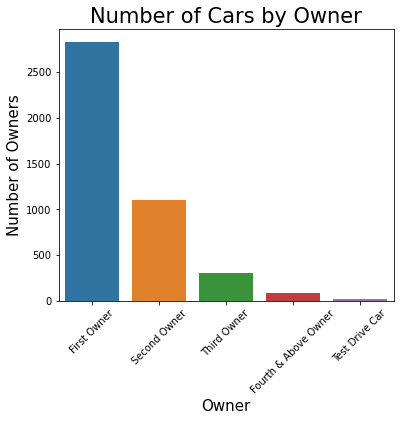

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(owners.index, list(owners))
plt.xlabel('Owner',fontsize=15)
plt.ylabel('Number of Owners', fontsize=15)
plt.title('Number of Cars by Owner', fontsize=21)
plt.xticks(rotation=45)
plt.show()

In [29]:
import re

def clean_name(name):
    return re.sub("[^a-zA-Z0-9]"," ",name)

In [30]:
car_data['clean_name'] = car_data['name'].apply(clean_name)

In [31]:
car_data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,clean_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti 800 AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti Wagon R LXI Minor


## Build Search Engine for the dataset

#### Import required libraries

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf = vectorizer.fit_transform(car_data['name'])

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
# search funtion
def search(name):
    name = clean_name(name)
    query_vec = vectorizer.transform([name])
    similarity = cosine_similarity(query_vec,tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = car_data.iloc[indices][::-1]
    return results

In [35]:
import ipywidgets as widgets
from IPython.display import display


car_name_input = widgets.Text(
    value = "Audi RS7",
    description = "Car Name:",
    disabled = False
)

car_list = widgets.Output()


def on_type(val):
    with car_list:
        car_list.clear_output()
        name = val["new"]
        if len(name)>4:
            display(search(name))
            
car_name_input.observe(on_type, names = 'value')

display(car_name_input, car_list)


Text(value='Audi RS7', description='Car Name:')

Output()

### Building ML model to Predict the price of Car

####  Preprocessing of dataset

In [36]:
df = car_data.copy()

In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,clean_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti 800 AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti Wagon R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai Verna 1 6 SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun RediGO T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda Amaze VX i DTEC


In [38]:
df.drop(['clean_name'],axis=1,inplace=True)

In [39]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [40]:
# Convert categorical variables to numerical
df['price'] = df['selling_price']
df['fuel'] = df['fuel'].astype('category').cat.codes
df['seller_type'] = df['seller_type'].astype('category').cat.codes
df['transmission'] = df['transmission'].astype('category').cat.codes
df['owner'] = df['owner'].astype('category').cat.codes
df['name'] = df['name'].astype('category').cat.codes

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,price
0,775,2007,60000,70000,4,1,1,0,60000
1,1041,2007,135000,50000,4,1,1,0,135000
2,505,2012,600000,100000,1,1,1,0,600000
3,118,2017,250000,46000,4,1,1,0,250000
4,279,2014,450000,141000,1,1,1,2,450000


In [42]:
df.drop(['selling_price'],axis=1, inplace=True)

In [43]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,price
0,775,2007,70000,4,1,1,0,60000
1,1041,2007,50000,4,1,1,0,135000
2,505,2012,100000,1,1,1,0,600000
3,118,2017,46000,4,1,1,0,250000
4,279,2014,141000,1,1,1,2,450000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   name          4340 non-null   int16
 1   year          4340 non-null   int64
 2   km_driven     4340 non-null   int64
 3   fuel          4340 non-null   int8 
 4   seller_type   4340 non-null   int8 
 5   transmission  4340 non-null   int8 
 6   owner         4340 non-null   int8 
 7   price         4340 non-null   int64
dtypes: int16(1), int64(3), int8(4)
memory usage: 127.3 KB


In [45]:
df.shape

(4340, 8)

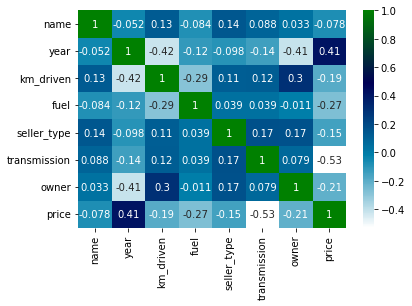

In [46]:
# check correlation between variables
sns.heatmap(df.corr(), annot=True, cmap='ocean_r')
plt.show()

All the variables correlate with the price variable negatively except year which correlate with price positively.
But correlation does not mean causation.

#### Divide the dataset into feature and target sets

In [162]:
# X = feature
# Y = target

X = df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [163]:
X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,775,2007,70000,4,1,1,0
1,1041,2007,50000,4,1,1,0
2,505,2012,100000,1,1,1,0
3,118,2017,46000,4,1,1,0
4,279,2014,141000,1,1,1,2


In [164]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: price, dtype: int64

In [165]:
X.shape

(4340, 7)

In [166]:
Y.shape

(4340,)

### Import libraries for the machine learning

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [175]:
# Split the dataset into train and test sets

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

In [176]:
print(x_train.shape)
print(x_test.shape)

(3038, 7)
(1302, 7)


In [177]:
print(y_train.shape)
print(y_test.shape)

(3038,)
(1302,)


### 

In [178]:
clf = LinearRegression(fit_intercept=True)

In [179]:
clf.fit(x_train, y_train)

LinearRegression()

In [180]:
# Predict the target
y_pred = clf.predict(x_test)

In [181]:
print(clf.score(x_test,y_test))

0.49833093625756697


In [182]:
y_test[:10]

621     750000
2752    385000
4210    819999
1335    700000
1090    835000
3798    200000
251     625000
2859    509999
3203    550000
366     200000
Name: price, dtype: int64

In [183]:
y_pred[:10]

array([ 621818.5965796 ,  535238.01386054,  770704.44266511,
        681365.24252026,  772796.30541028,  445060.37796456,
        449809.51514074, 1311790.08855434,  683278.55216421,
        274674.78062367])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


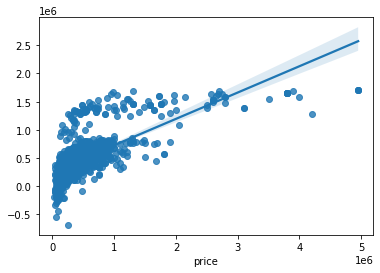

In [184]:
sns.regplot(y_test,y_pred)
plt.show()